In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

## Feature Selection for Daily Summary Data 

For Daily Summary full data (DSFD) the labels to be predicted are High and Low. 

Transforming data into a supervised learning problem

In [88]:
file_path = "C:/Users/Dell/Desktop/Ryerson/Capstone/Data Exploration/DSFD.csv"
DSFD = pd.read_csv(file_path, index_col='date')
DSFD = DSFD.drop([DSFD.columns[0]] ,  axis='columns')

In [89]:
DSFD.head()

,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price,RSI,MACD_sig,slow_stoch,Open_RoC,High_RoC,Low_RoC,Close_RoC,Weighted_Price_RoC
date,,,,,,,,,,,,,,,
2013-04-03,116.0,158.41,110.0,133.78,16468.610754,2.126462e+06,130.08716,43.384086,0.733919,0.271676,0.0,0.0,0.0,0.0,0.0
2013-04-04,116.0,158.41,110.0,133.78,16468.610754,2.126462e+06,130.08716,43.384086,0.733919,0.271676,0.0,0.0,0.0,0.0,0.0
2013-04-05,116.0,158.41,110.0,133.78,16468.610754,2.126462e+06,130.08716,43.384086,0.733919,0.271676,0.0,0.0,0.0,0.0,0.0
2013-04-06,116.0,158.41,110.0,133.78,16468.610754,2.126462e+06,130.08716,43.384086,0.733919,0.271676,0.0,0.0,0.0,0.0,0.0
2013-04-07,116.0,158.41,110.0,133.78,16468.610754,2.126462e+06,130.08716,43.384086,0.733919,0.271676,0.0,0.0,0.0,0.0,0.0


As discussed during cleaning phase, Volume_currency is not relevant, once it is a function of Volume_BTC and Weighted Price

In [90]:
DSFD = DSFD.drop([DSFD.columns[5]] ,  axis='columns')

During Data exploration phase, ACF of High and Low attributes set a threshold of what lagged values where significant for the attributes.

### Modifing data for feature analysis of High Price as Label


For High price a total of the 25 previous values will be considered.

In [91]:
# Stationarizing the data
differenced = DSFD.diff(1)
differenced = differenced[1:]

In [92]:
differenced.to_csv("differenced.csv")

In [93]:
# FS = Feature Selection
FS_High_Label = differenced.iloc[:,1]

In [94]:
FS_High_data = differenced.copy()
FS_High_data = FS_High_data.drop(FS_High_data.columns[1] ,  axis='columns')

In [95]:
for i in range(25,0,-1):
    FS_High_data['High t-'+str(i)] = FS_High_Label.shift(i)
FS_High_data.head(10)

,Open,Low,Close,Volume_BTC,Weighted_Price,RSI,MACD_sig,slow_stoch,Open_RoC,High_RoC,...,High t-10,High t-9,High t-8,High t-7,High t-6,High t-5,High t-4,High t-3,High t-2,High t-1
date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,0.00,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,0.00,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2013-04-06,0.00,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2013-04-07,0.00,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00
2013-04-08,17.00,23.00,51.82,-626.472953,51.354143,0.0,0.0,0.0,0.136759,0.223080,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00
2013-04-09,51.70,31.34,43.40,-2654.270057,25.635468,0.0,0.0,0.0,0.191625,-0.050529,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,39.59
2013-04-10,44.24,-94.34,-67.00,9085.938325,3.539396,0.0,0.0,0.0,-0.113657,-0.075231,...,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,39.59,37.29
2013-04-11,-66.94,-20.00,-78.60,18913.611082,-86.537585,0.0,0.0,0.0,-0.560591,-0.468075,...,NaN,NaN,NaN,0.0,0.0,0.00,0.00,39.59,37.29,24.05
2013-04-12,-80.86,-5.00,26.50,-10266.131583,-47.400034,0.0,0.0,0.0,-0.345557,-0.098133,...,NaN,NaN,0.0,0.0,0.0,0.00,39.59,37.29,24.05,-80.34


In [96]:
FS_High_data.columns

Index(['Open', 'Low', 'Close', 'Volume_BTC', 'Weighted_Price', 'RSI',
       'MACD_sig', 'slow_stoch', 'Open_RoC', 'High_RoC', 'Low_RoC',
       'Close_RoC', 'Weighted_Price_RoC', 'High t-25', 'High t-24',
       'High t-23', 'High t-22', 'High t-21', 'High t-20', 'High t-19',
       'High t-18', 'High t-17', 'High t-16', 'High t-15', 'High t-14',
       'High t-13', 'High t-12', 'High t-11', 'High t-10', 'High t-9',
       'High t-8', 'High t-7', 'High t-6', 'High t-5', 'High t-4', 'High t-3',
       'High t-2', 'High t-1'],
      dtype='object')

In [97]:
for column in range(13):
    for i in range(25,0,-1):
        FS_High_data[FS_High_data.columns[column]+' t-'+str(i)] = FS_High_data.iloc[:,column].shift(i)

FS_High_data.head()

,Open,Low,Close,Volume_BTC,Weighted_Price,RSI,MACD_sig,slow_stoch,Open_RoC,High_RoC,...,Weighted_Price_RoC t-10,Weighted_Price_RoC t-9,Weighted_Price_RoC t-8,Weighted_Price_RoC t-7,Weighted_Price_RoC t-6,Weighted_Price_RoC t-5,Weighted_Price_RoC t-4,Weighted_Price_RoC t-3,Weighted_Price_RoC t-2,Weighted_Price_RoC t-1
date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2013-04-06,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2013-04-07,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2013-04-08,17.0,23.0,51.82,-626.472953,51.354143,0.0,0.0,0.0,0.136759,0.22308,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [98]:
FS_High_data.shape

(2321, 363)

Removing data from current position

In [99]:
FS_High_data = FS_High_data.iloc[:,13:]
FS_High_data.columns

Index(['High t-25', 'High t-24', 'High t-23', 'High t-22', 'High t-21',
       'High t-20', 'High t-19', 'High t-18', 'High t-17', 'High t-16',
       ...
       'Weighted_Price_RoC t-10', 'Weighted_Price_RoC t-9',
       'Weighted_Price_RoC t-8', 'Weighted_Price_RoC t-7',
       'Weighted_Price_RoC t-6', 'Weighted_Price_RoC t-5',
       'Weighted_Price_RoC t-4', 'Weighted_Price_RoC t-3',
       'Weighted_Price_RoC t-2', 'Weighted_Price_RoC t-1'],
      dtype='object', length=350)

Each row of the data has the last 10 steps for all attributes, with the exception of the label attribute High which has the last 25 steps. 

In [145]:
#Removing NaN values
FS_High_data = FS_High_data.iloc[25:,]
FS_High_Label = FS_High_Label.iloc[25:]
FS_High_data.shape, FS_High_Label.shape

((2271, 350), (2271,))

In [148]:
# Let's also use a 90% split for later check feature reduction rmse

train_split = 0.9

n_train_rows = int(FS_High_data.shape[0]*train_split)

X_train = FS_High_data[0:n_train_rows]
X_test = FS_High_data[n_train_rows:]
Y_train = FS_High_Label[0:n_train_rows]
Y_test = FS_High_Label[n_train_rows:]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((2043, 350), (2043,), (228, 350), (228,))

Applying random forest to calculate feature importance

In [236]:
from sklearn.ensemble import RandomForestRegressor

# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X_train, Y_train)
# show importance scores
print(model.feature_importances_)

[0.0034985  0.00638326 0.00149484 0.00776279 0.00206178 0.00113197
 0.00295909 0.00146214 0.00965174 0.00194933 0.00213087 0.00443428
 0.00205212 0.00777087 0.00679719 0.0023801  0.00332296 0.00732869
 0.004052   0.00299736 0.00896806 0.00172024 0.00169595 0.00381018
 0.00902529 0.00105031 0.00192679 0.00108017 0.00148599 0.00199455
 0.00184934 0.00050827 0.00273348 0.0010746  0.00397926 0.01158851
 0.01408262 0.00146831 0.00406312 0.0067145  0.00989723 0.00148055
 0.00116111 0.00279311 0.00083734 0.00239167 0.00283649 0.00302487
 0.00178996 0.00563206 0.00071693 0.00186667 0.00266172 0.0022768
 0.00671488 0.00817673 0.00371926 0.00134322 0.00456771 0.00631147
 0.01234402 0.00399559 0.00562697 0.00945054 0.03038097 0.00233234
 0.00167207 0.00286349 0.00137692 0.00235447 0.00538438 0.00493257
 0.00086455 0.00384061 0.03941061 0.00101544 0.00102861 0.00121743
 0.0008977  0.00106491 0.00077164 0.00169203 0.00146559 0.00411352
 0.01793242 0.01220904 0.00061586 0.00303854 0.00600933 0.00819

In [237]:
names_high = FS_High_data.columns.values[0:]

Saving data for plotting in Tableau

In [238]:
data = {"features":names_high, "importance": model.feature_importances_}
High_Feature_importance = pd.DataFrame(data)
High_Feature_importance.to_csv("High_Feature_importance.csv")

Applying Gradient Boosting regressor to calculate feature importance

In [156]:
from sklearn.ensemble import GradientBoostingRegressor

# fit random Gradient boosting regressor model
gbr = GradientBoostingRegressor(n_estimators=500, random_state=1)
gbr.fit(X_train, Y_train)
# show importance scores
print(gbr.feature_importances_)

[2.40167374e-03 1.80458559e-03 7.53597589e-05 1.51256639e-03
 2.23984401e-03 3.84703003e-03 9.22391061e-04 9.15892847e-04
 8.76673329e-03 9.48224538e-04 2.44791426e-03 2.64394509e-04
 2.21449593e-03 3.50430705e-04 1.34421244e-04 7.27118160e-04
 5.79678883e-04 6.70748912e-03 2.88245931e-03 9.58476602e-04
 3.78388508e-04 2.95785650e-02 1.15381122e-03 1.83916410e-04
 2.10011607e-02 3.60785180e-04 5.42180239e-04 3.51182346e-04
 8.52113439e-05 7.43673154e-04 1.57953762e-04 6.46719527e-03
 2.61117579e-03 1.07386203e-03 5.43657148e-03 1.43219523e-04
 3.03076702e-03 5.95575256e-04 8.40475721e-03 2.47034180e-04
 5.63974951e-04 5.07775738e-03 7.43401372e-04 2.58165842e-04
 2.24501898e-03 6.87768712e-08 1.95419626e-03 1.08630244e-03
 3.62018558e-04 7.36568707e-04 1.33802468e-03 2.73274073e-03
 1.99948498e-04 5.90749448e-04 2.73545196e-04 3.04050716e-03
 4.12626091e-03 1.06747217e-03 4.04132257e-03 6.01861217e-04
 3.19664343e-03 1.10789496e-02 3.50887880e-03 3.24453224e-04
 1.07654391e-02 1.061178

Saving data for plotting in Tableau

In [157]:
data = {"features":names_high, "importance": gbr.feature_importances_}
High_Feature_importance_gbr = pd.DataFrame(data)
High_Feature_importance_gbr.to_csv("High_Feature_importance_gbr.csv")

### Calculating the MSE from removing attributes based on the calculated importance 

In [256]:
from sklearn.metrics import mean_squared_error 
    
def backward_elimination(data, feature_rank, label, algorithm=GradientBoostingRegressor):
    '''Objective: Train / Test and calculate the MSE for the data, whilst removing feature for each loop, based on
       the importance calculated for each feature
       Input: data -> Dataset to be trained and tested
              feature_rank -> list of features ordered from the highest importance to lowest
              label -> name of the label training and testing
              algorithm -> GradientBoostingRegressor*
    
    * random forest will not be excecuted since it had similiar results and is more computational consuming
    '''
    differenced =data.diff(1)
    differenced = differenced[1:]
    Labels = differenced[label]
    df = differenced.drop(columns=label)
    mse=[]
    
    # Calculating the Mean Squared Error for the data with all features
    data_full = df.copy()

    for i in range(25,0,-1):
        data_full[str(label)+' t-'+str(i)] = Labels.shift(i)

    for column in df.columns:
        for i in range(25,0,-1):
            data_full[column+' t-'+str(i)] = data_full[column].shift(i)


    data_full = data_full.iloc[:,len(df.columns):]

    #Removing NaN values
    data_full_clean = data_full.iloc[25:,]
    Labels_clean = Labels.iloc[25:,]

    #Spliting data
    train_split = 0.9

    n_train_rows = int(data_full_clean.shape[0]*train_split)

    X_train = data_full_clean[0:n_train_rows]
    X_test = data_full_clean[n_train_rows:]
    Y_train = Labels_clean[0:n_train_rows]
    Y_test = Labels_clean[n_train_rows:]

    # fit regressor model
    model = algorithm(n_estimators=500, random_state=1)
    model.fit(X_train, Y_train)

    mse_full = mean_squared_error(model.predict(X_test),Y_test)

    mse.append(mse_full)

    # Eliminate one be one the features from lowest to highest importance
    for i in range(len(feature_rank)-1,4,-1): # At least the 4 top features are maintained

        df = df.drop(columns=feature_rank[i])

        data_ = df.copy()

        for i in range(25,0,-1):
            data_[str(label)+' t-'+str(i)] = Labels.shift(i)

        for column in df.columns:
            for i in range(25,0,-1):
                data_[column+' t-'+str(i)] = data_[column].shift(i)


        data_ = data_.iloc[:,len(df.columns):]

        #Removing NaN values
        data_clean = data_.iloc[25:,]
        Labels_clean = Labels.iloc[25:,]

        #Spliting data
        train_split = 0.9

        n_train_rows = int(data_clean.shape[0]*train_split)

        X_train = data_clean[0:n_train_rows]
        X_test = data_clean[n_train_rows:]
        Y_train = Labels_clean[0:n_train_rows]
        Y_test = Labels_clean[n_train_rows:]

        # fit regressor model
        model = algorithm(n_estimators=500, random_state=1)
        model.fit(X_train, Y_train)
        
        mse_ = mean_squared_error(model.predict(X_test),Y_test)
    
        mse.append(mse_)
        
        
    return(mse)



In [257]:
# Ranking of importance based on the plots compiled in Tableau
High_feature_importance_ranked = ['Close','Low','High','Weighted_Price','Open','RSI','slow_stoch','Low_RoC','Weighted_Price_RoC','Volume_BTC','High_RoC','Open_RoC','MACD_sig','Close_RoC']

In [258]:
mse_backward_High_gbr = backward_elimination(DSFD, High_feature_importance_ranked, 'High')

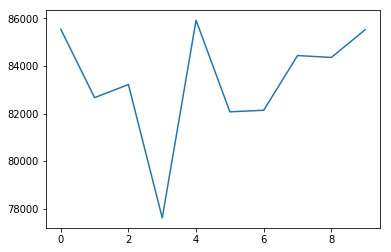

In [259]:
plt.plot(mse_backward_High_gbr)

### Modifing data for feature analysis of Low Price as Label


For Low price a total of the 25 previous values will be considered.

In [110]:
# FS = Feature Selection
FS_Low_Label = differenced.iloc[:,2]

In [111]:
FS_Low_data = differenced.copy()
FS_Low_data = FS_Low_data.drop(FS_Low_data.columns[2] ,  axis='columns')

In [112]:
for i in range(25,0,-1):
    FS_Low_data['Low t-'+str(i)] = FS_Low_Label.shift(i)
FS_Low_data.head(10)

,Open,High,Close,Volume_BTC,Weighted_Price,RSI,MACD_sig,slow_stoch,Open_RoC,High_RoC,...,Low t-10,Low t-9,Low t-8,Low t-7,Low t-6,Low t-5,Low t-4,Low t-3,Low t-2,Low t-1
date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,0.00,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,0.00,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2013-04-06,0.00,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2013-04-07,0.00,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00
2013-04-08,17.00,39.59,51.82,-626.472953,51.354143,0.0,0.0,0.0,0.136759,0.223080,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00
2013-04-09,51.70,37.29,43.40,-2654.270057,25.635468,0.0,0.0,0.0,0.191625,-0.050529,...,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,23.00
2013-04-10,44.24,24.05,-67.00,9085.938325,3.539396,0.0,0.0,0.0,-0.113657,-0.075231,...,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.00,23.00,31.34
2013-04-11,-66.94,-80.34,-78.60,18913.611082,-86.537585,0.0,0.0,0.0,-0.560591,-0.468075,...,NaN,NaN,NaN,0.0,0.0,0.0,0.00,23.00,31.34,-94.34
2013-04-12,-80.86,-67.00,26.50,-10266.131583,-47.400034,0.0,0.0,0.0,-0.345557,-0.098133,...,NaN,NaN,0.0,0.0,0.0,0.0,23.00,31.34,-94.34,-20.00


In [113]:
FS_Low_data.columns

Index(['Open', 'High', 'Close', 'Volume_BTC', 'Weighted_Price', 'RSI',
       'MACD_sig', 'slow_stoch', 'Open_RoC', 'High_RoC', 'Low_RoC',
       'Close_RoC', 'Weighted_Price_RoC', 'Low t-25', 'Low t-24', 'Low t-23',
       'Low t-22', 'Low t-21', 'Low t-20', 'Low t-19', 'Low t-18', 'Low t-17',
       'Low t-16', 'Low t-15', 'Low t-14', 'Low t-13', 'Low t-12', 'Low t-11',
       'Low t-10', 'Low t-9', 'Low t-8', 'Low t-7', 'Low t-6', 'Low t-5',
       'Low t-4', 'Low t-3', 'Low t-2', 'Low t-1'],
      dtype='object')

In [114]:
for column in range(13):
    for i in range(25,0,-1):
        FS_Low_data[FS_Low_data.columns[column]+' t-'+str(i)] = FS_Low_data.iloc[:,column].shift(i)

FS_Low_data.head()

,Open,High,Close,Volume_BTC,Weighted_Price,RSI,MACD_sig,slow_stoch,Open_RoC,High_RoC,...,Weighted_Price_RoC t-10,Weighted_Price_RoC t-9,Weighted_Price_RoC t-8,Weighted_Price_RoC t-7,Weighted_Price_RoC t-6,Weighted_Price_RoC t-5,Weighted_Price_RoC t-4,Weighted_Price_RoC t-3,Weighted_Price_RoC t-2,Weighted_Price_RoC t-1
date,,,,,,,,,,,,,,,,,,,,,
2013-04-04,0.0,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,0.0,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2013-04-06,0.0,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2013-04-07,0.0,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2013-04-08,17.0,39.59,51.82,-626.472953,51.354143,0.0,0.0,0.0,0.136759,0.22308,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [115]:
FS_Low_data.shape

(2321, 363)

Removing data from current position

In [116]:
FS_Low_data = FS_Low_data.iloc[:,13:]
FS_Low_data.columns

Index(['Low t-25', 'Low t-24', 'Low t-23', 'Low t-22', 'Low t-21', 'Low t-20',
       'Low t-19', 'Low t-18', 'Low t-17', 'Low t-16',
       ...
       'Weighted_Price_RoC t-10', 'Weighted_Price_RoC t-9',
       'Weighted_Price_RoC t-8', 'Weighted_Price_RoC t-7',
       'Weighted_Price_RoC t-6', 'Weighted_Price_RoC t-5',
       'Weighted_Price_RoC t-4', 'Weighted_Price_RoC t-3',
       'Weighted_Price_RoC t-2', 'Weighted_Price_RoC t-1'],
      dtype='object', length=350)

Each row of the data has the last 10 steps for all attributes, with the exception of the label attribute High which has the last 25 steps. 

In [117]:
#Removing NaN values
FS_Low_data = FS_Low_data.iloc[25:,]
FS_Low_Label = FS_Low_Label.iloc[25:]
FS_Low_data.shape, FS_Low_Label.shape

((2296, 350), (2296,))

In [230]:
# Let's also use a 90% split for later check feature reduction rmse

train_split = 0.9

n_train_rows = int(FS_Low_data.shape[0]*train_split)

X_train = FS_Low_data[0:n_train_rows]
X_test = FS_Low_data[n_train_rows:]
Y_train = FS_Low_Label[0:n_train_rows]
Y_test = FS_Low_Label[n_train_rows:]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((2066, 350), (2066,), (230, 350), (230,))

Applying Random forest regressor to calculate feature importance

In [231]:
from sklearn.ensemble import RandomForestRegressor

# fit random forest model
model_low = RandomForestRegressor(n_estimators=500, random_state=1)
model_low.fit(X_train, Y_train)
# show importance scores
print(model_low.feature_importances_)

[0.0034985  0.00638326 0.00149484 0.00776279 0.00206178 0.00113197
 0.00295909 0.00146214 0.00965174 0.00194933 0.00213087 0.00443428
 0.00205212 0.00777087 0.00679719 0.0023801  0.00332296 0.00732869
 0.004052   0.00299736 0.00896806 0.00172024 0.00169595 0.00381018
 0.00902529 0.00105031 0.00192679 0.00108017 0.00148599 0.00199455
 0.00184934 0.00050827 0.00273348 0.0010746  0.00397926 0.01158851
 0.01408262 0.00146831 0.00406312 0.0067145  0.00989723 0.00148055
 0.00116111 0.00279311 0.00083734 0.00239167 0.00283649 0.00302487
 0.00178996 0.00563206 0.00071693 0.00186667 0.00266172 0.0022768
 0.00671488 0.00817673 0.00371926 0.00134322 0.00456771 0.00631147
 0.01234402 0.00399559 0.00562697 0.00945054 0.03038097 0.00233234
 0.00167207 0.00286349 0.00137692 0.00235447 0.00538438 0.00493257
 0.00086455 0.00384061 0.03941061 0.00101544 0.00102861 0.00121743
 0.0008977  0.00106491 0.00077164 0.00169203 0.00146559 0.00411352
 0.01793242 0.01220904 0.00061586 0.00303854 0.00600933 0.00819

Saving data for plotting in Tableau

In [232]:
names = FS_Low_data.columns.values[0:]

In [233]:
data_low = {"features":names, "importance": model_low.feature_importances_}
Low_Feature_importance = pd.DataFrame(data_low)
Low_Feature_importance.to_csv("Low_Feature_importance.csv")

Applying Gradient Boosting regressor to calculate feature importance

In [234]:
from sklearn.ensemble import GradientBoostingRegressor

# fit random Gradient boosting regressor model
gbr_low = GradientBoostingRegressor(n_estimators=500, random_state=1)
gbr_low.fit(X_train, Y_train)
# show importance scores
print(gbr_low.feature_importances_)

[5.72632808e-04 4.43686394e-03 8.95218824e-04 1.26065136e-02
 3.89538837e-03 4.15399003e-04 5.98521767e-03 1.06627094e-03
 2.09568405e-04 1.59419757e-03 7.63151642e-04 3.89711981e-04
 1.32500562e-03 1.39488656e-04 2.18204990e-02 1.18316607e-03
 1.80541131e-03 4.37795883e-03 4.70923731e-03 2.68744643e-03
 4.68994097e-04 1.15402206e-03 2.28218194e-03 6.09867121e-03
 7.93220617e-03 5.40326278e-04 7.07130180e-04 2.95498483e-04
 9.15250250e-04 4.82890851e-05 5.02387046e-03 3.97281579e-04
 7.65225376e-04 7.12577817e-04 2.21483648e-05 1.26195820e-03
 2.98815405e-02 3.50876470e-03 8.05928035e-04 8.73350964e-03
 4.28462934e-05 2.29774850e-04 3.24423522e-04 2.72004987e-03
 1.26589221e-03 8.83326025e-04 2.64636904e-03 6.26541501e-03
 1.70349954e-03 2.25157925e-03 6.37508524e-04 1.04113805e-03
 2.84752902e-04 1.47131744e-03 1.32923169e-03 4.79971565e-03
 9.43041216e-03 5.24986377e-04 3.31679973e-03 1.05317731e-02
 5.16244081e-02 3.99564687e-04 4.19211480e-03 3.64600215e-03
 1.88442055e-02 1.189881

Saving data for plotting in Tableau

In [239]:
data_low_gbr = {"features":names, "importance": gbr_low.feature_importances_}
Low_Feature_importance_gbr = pd.DataFrame(data_low_gbr)
Low_Feature_importance_gbr.to_csv("Low_Feature_importance_gbr.csv")

### Calculating the MSE from removing attributes based on the calculated importance 

In [260]:
# Rank of importance based on the plots compiled in Tableau
Low_feature_importance_ranked = ['Close','Weighted_Price','High','Low','Open','Weighted_Price_RoC','Low_RoC','RSI','Volume_BTC','slow_stoch','High_RoC','MACD_sig','Open_RoC','Close_RoC']

In [261]:
mse_backward_Low_gbr = backward_elimination(DSFD, Low_feature_importance_ranked, 'Low', GradientBoostingRegressor)

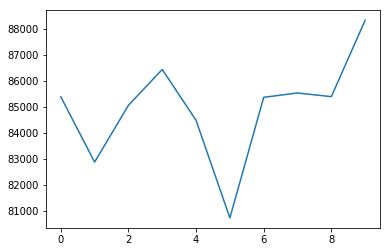

In [262]:
plt.plot(mse_backward_Low_gbr)

Saving MSE results for both labels

In [264]:
data_mse = {"features to extract":np.arange(10), "mse_High": mse_backward_High_gbr, "mse_Low": mse_backward_Low_gbr}
features_to_extract = pd.DataFrame(data_mse)
features_to_extract.to_csv("Feature_to_extract.csv")

The results of both graphs show different number of features to be extracted. Due to the fact that the importance is diferent if the label is high price or low price, a combined analysis must be made. The combined analysis averages and rank the importance for both High Price and Low Price, then performs a new calculation based on the combined rank.

In [265]:
combined_feature_importance_ranked = ['Close','Weighted_Price','High','Low','Open','Low_RoC','RSI','slow_stoch','High_RoC','Volume_BTC','Weighted_Price_RoC','MACD_sig','Open_RoC','Close_RoC']
mse_backward_high = backward_elimination(DSFD, combined_feature_importance_ranked, 'High', GradientBoostingRegressor)

In [266]:
mse_backward_low = backward_elimination(DSFD, combined_feature_importance_ranked, 'Low', GradientBoostingRegressor)

In [267]:
data_mse_combined = {"Number of Features Extracted":np.arange(10), "High Price as Label": mse_backward_high, "Low Price as Label": mse_backward_low}
features_to_extract_combined = pd.DataFrame(data_mse_combined)
features_to_extract_combined.to_csv("Feature_to_extract_combined.csv")

## Feature Selection for Day Trade Data

For Day Trade Data the label to be predicted if Weighted Price. 

Transforming data into a supervised learning problem

In [123]:
file_path = "C:/Users/Dell/Desktop/Ryerson/Capstone/Data Exploration/Day_trade_data.csv"
DayTrade = pd.read_csv(file_path, index_col='Time')
DayTrade = DayTrade.drop([DayTrade.columns[0]] ,  axis='columns')

In [124]:
DayTrade.head()

,Open,High,Low,Close,Volume_.BTC.,Volume_.Currency.,Weighted_Price,date,Open_RoC,High_RoC,Low_RoC,Close_RoC,Weighted_Price_RoC,RSI,MACD_index,slow_stoch
Time,,,,,,,,,,,,,,,,
2013-04-03 00:00:00,116.00,116.00,116.00,116.00,31.713233,3678.735005,116.000000,2013-04-03,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,-0.36038,0.084906
2013-04-03 00:01:00,116.00,116.00,116.00,116.00,31.713233,3678.735005,116.000000,2013-04-03,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,-0.36038,0.084906
2013-04-03 00:02:00,116.00,116.58,116.00,116.58,2.050985,238.357034,116.215883,2013-04-03,0.000000,0.004988,0.000000,0.004988,0.001859,33.333333,-0.36038,0.084906
2013-04-03 00:03:00,116.98,117.00,116.98,117.00,23.000000,2690.890000,116.995217,2013-04-03,0.008413,0.003596,0.008413,0.003596,0.006684,33.333333,-0.36038,0.084906
2013-04-03 00:04:00,117.00,117.00,117.00,117.00,50.000000,5850.000000,117.000000,2013-04-03,0.000171,0.000000,0.000171,0.000000,0.000041,33.333333,-0.36038,0.084906


As discussed during cleaning phase, Volume_currency is not relevant, once it is a function of Volume_BTC and Weighted Price

In [125]:
DayTrade = DayTrade.drop([DayTrade.columns[5]] ,  axis='columns')

During Data exploration phase, ACF of Weighted Price set a threshold of what lagged values where significant for the attributes.

### Modifing data for feature analysis of Weighted Price as Label


For Weighted price a total of the 25 previous values will be considered.

The Day Trade data contains the minute to minute data for a total of 1735 days. The analysis must be limited within each day.

In [127]:
days_in_data = set(DayTrade.iloc[:,6])
days_in_data = list(days_in_data)
len(days_in_data)

1735

In [128]:
DayTrade.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_.BTC.', 'Weighted_Price',
       'date', 'Open_RoC', 'High_RoC', 'Low_RoC', 'Close_RoC',
       'Weighted_Price_RoC', 'RSI', 'MACD_index', 'slow_stoch'],
      dtype='object')

In [129]:
import random

random.shuffle(days_in_data)

In [130]:
def gbr_day_trade():
    mu_old = 0
    n_old = 0
    counter = 1

    # Feature Importance must be calculated for each day and then average for all days
    for day in days_in_data:
        # Filtering data for each day
        df = DayTrade[DayTrade['date'].values==day]
        df = df.drop([df.columns[6]] ,  axis='columns')
        # Performing stationarization
        differenced =df.diff(1)
        differenced = differenced[1:]

        # FS = Feature Selection
        FS_Weighted_Price_Label = differenced.iloc[:,5]
        FS_Weighted_Price_data = differenced.copy()
        FS_Weighted_Price_data = FS_Weighted_Price_data.drop(FS_Weighted_Price_data.columns[5] ,  axis='columns')

        for i in range(25,0,-1):
            FS_Weighted_Price_data['Weighted Price t-'+str(i)] = FS_Weighted_Price_Label.shift(i)

        for column in range(13):
            for i in range(25,0,-1):
                FS_Weighted_Price_data[FS_Weighted_Price_data.columns[column]+' t-'+str(i)] = FS_Weighted_Price_data.iloc[:,column].shift(i)


        FS_Weighted_Price_data = FS_Weighted_Price_data.iloc[:,13:]

        #Removing NaN values
        FS_Weighted_Price_data = FS_Weighted_Price_data.iloc[25:,]
        FS_Weighted_Price_Label = FS_Weighted_Price_Label.iloc[25:]

        # fit Gradient boosting regressor model
        gbr = GradientBoostingRegressor(n_estimators=500, random_state=1)
        gbr.fit(FS_Weighted_Price_data, FS_Weighted_Price_Label)

        # Calculate average of feature importance accumulatively 
        n_new = n_old + 1

        # New Average = ((n-1)*old Average + new data) / n
        average_gbr_FS = ((n_old* mu_old) + gbr.feature_importances_)/ n_new

        n_old = n_new

        if counter <= 10:
            mu_old = average_gbr_FS
            print(counter)
            counter += 1
        else: 
            # check if average of the feature importance is changing less than 1%
            change_rate = np.max(np.abs(average_gbr_FS-mu_old)/mu_old)
            print(change_rate)
            if np.max(np.abs(average_gbr_FS-mu_old)/mu_old) < 0.03:
                return(average_gbr_FS)
            else:
                mu_old = average_gbr_FS
                print(counter)
                counter += 1
    return(average_gbr_FS, FS_Weighted_Price_data.columns.values[0:])

average_gbr_FS, names_weighted_price = gbr_day_trade()

1
2
3
4
5
6
7
8
9
10
1.4482051568975922
11
1.0288593985943164
12
0.6145396456717547
13
0.7117592472539815
14
0.8434605938068162
15
0.6573391651922671
16
1.021877474052199
17
0.5103258612849576
18
0.6842891627838433
19
0.5138934164088209
20
0.31141717241963185
21
1.1432442543962853
22
0.4254262567804239
23
0.32030669328913947
24
0.3007087193864645
25
0.34565700141907213
26
0.23996130518583625
27
0.536821225150203
28
0.26693760229348146
29
0.7442404514925924
30
0.313751531184825
31
0.238076488263751
32
0.20408981403459386
33
0.19004930691134928
34
0.24876540128389849
35
0.2676334824547362
36
0.30644032176396907
37
0.18737395682612243
38
0.34221150917618204
39
0.27858309785692514
40
1.549373163981651
41
0.23764660223583886
42
0.2079235770255554
43
0.17217053166573493
44
0.12358876887334733
45
0.24092075011763234
46
0.24680722317907297
47
0.11842488611625175
48
0.18330478299235664
49
0.10610545735793687
50
0.2702775959313312
51
0.2167805707375437
52
0.275149955014247
53
0.26926839389568274

Saving data for plotting in Tableau

In [136]:
data = {"features":names_weighted_price, "importance": average_gbr_FS}
Weighted_price_Feature_importance = pd.DataFrame(data)
Weighted_price_Feature_importance.to_csv("Weighted_Feature_importance_gbr.csv")

In [137]:
def rf_day_trade():
    mu_old = 0
    n_old = 0
    counter = 1

    # Feature Importance must be calculated for each day and then average for all days
    for day in days_in_data:
        # Filtering data for each day
        df = DayTrade[DayTrade['date'].values==day]
        df = df.drop([df.columns[6]] ,  axis='columns')
        # Performing stationarization
        differenced =df.diff(1)
        differenced = differenced[1:]

        # FS = Feature Selection
        FS_Weighted_Price_Label = differenced.iloc[:,5]
        FS_Weighted_Price_data = differenced.copy()
        FS_Weighted_Price_data = FS_Weighted_Price_data.drop(FS_Weighted_Price_data.columns[5] ,  axis='columns')

        for i in range(25,0,-1):
            FS_Weighted_Price_data['Weighted Price t-'+str(i)] = FS_Weighted_Price_Label.shift(i)

        for column in range(13):
            for i in range(25,0,-1):
                FS_Weighted_Price_data[FS_Weighted_Price_data.columns[column]+' t-'+str(i)] = FS_Weighted_Price_data.iloc[:,column].shift(i)


        FS_Weighted_Price_data = FS_Weighted_Price_data.iloc[:,13:]

        #Removing NaN values
        FS_Weighted_Price_data = FS_Weighted_Price_data.iloc[25:,]
        FS_Weighted_Price_Label = FS_Weighted_Price_Label.iloc[25:]

        # fit Random Forestregressor model
        rf = RandomForestRegressor(n_estimators=500, random_state=1)
        rf.fit(FS_Weighted_Price_data, FS_Weighted_Price_Label)

        # Calculate average of feature importance accumulatively 
        n_new = n_old + 1

        # New Average = ((n-1)*old Average + new data) / n
        average_rf_FS = ((n_old* mu_old) + rf.feature_importances_)/ n_new

        n_old = n_new

        if counter <= 10:
            mu_old = average_gbr_FS
            print(counter)
            counter += 1
        else: 
            # check if average of the feature importance is changing less than 1%
            change_rate = np.max(np.abs(average_rf_FS-mu_old)/mu_old)
            print(change_rate)
            if np.max(np.abs(average_rf_FS-mu_old)/mu_old) < 0.03:
                return(average_rf_FS, FS_Weighted_Price_data.columns.values[0:])
            else:
                mu_old = average_rf_FS
                print(counter)
                counter += 1
    return(average_rf_FS, FS_Weighted_Price_data.columns.values[0:])

average_rf_FS, names_weighted_price = rf_day_trade()

1
2
3
4
5
6
7
8
9
10
0.49279775697911105
11
0.5363693694691317
12
0.2688031001426944
13
0.23938041746250338
14
0.3435179044468613
15
0.4036747506845691
16
0.23462403400841578
17
0.36424196000784126
18
0.2892842838995011
19
0.4903313888164817
20
0.13493959127595995
21
0.9364643608329795
22
0.18091823555119918
23
0.1315013609442432
24
0.19305267884867774
25
0.07159984258763942
26
0.10087989243507954
27
0.266227653212944
28
0.26478959739402147
29
0.3648188601686901
30
0.20568720366346716
31
0.1391856726100025
32
0.14508029022118596
33
0.16884053774520355
34
0.1272907111518542
35
0.07585007853065756
36
0.18884282611120629
37
0.18433560487910075
38
0.16635727293408106
39
0.1603338618945676
40
0.8052004948634875
41
0.08613512914253263
42
0.22791764552722155
43
0.2418917430451054
44
0.0942601744787621
45
0.13102029721226574
46
0.09221218275937045
47
0.0791217621921939
48
0.16380630023583082
49
0.07472878209082523
50
0.2749612235159945
51
0.1390719013597077
52
0.0629002974479689
53
0.077562528

Saving data for plotting in Tableau

In [138]:
data = {"features":names_weighted_price, "importance": average_rf_FS}
Weighted_price_Feature_importance = pd.DataFrame(data)
Weighted_price_Feature_importance.to_csv("Weighted_Feature_importance_rf.csv")

In [ ]:
day_trade_feature_importance_ranked = ['Weighted Price','Close','Volume_.BTC.','RSI','slow_stoch','Low','High','Low_RoC','Close_RoC','High_RoC','Weighted_Price_RoC','Open_RoC','Open','MACD_index']
mse_old = 0
n_old = 0
old_min_idx = 0
min_idx_counter = 0

for day in days_in_data:
    while min_idx_counter <=10: # if the min rmse index remains constant then end the loop
        day_data = DayTrade[DayTrade['date'].values==day]
        day_data = day_data.drop(columns='date')
        day_mse = backward_elimination(day_data, day_trade_feature_importance_ranked, 'Weighted_Price')
        # Calculate average of the mean squared error of the days accumulatively 
        n_new = n_old + 1

        # New Average = ((n-1)*old Average + new data) / n
        avg_mse = ((n_old* mse_old) + np.array(day_mse))/ n_new
        
        n_old = n_new
        
        print(n_new)

        new_min_idx = np.argmin(avg_mse)

        if old_min_idx == new_min_idx:  # check if the min rmse index remains constant 
            min_idx_counter += 1

        else:
            min_idx_counter = 0


In [ ]:
day_trade_mse = {"features to extract":np.arange(10), "Weighted Price as Label": avg_mse}
features_to_extract_day_trade = pd.DataFrame(day_trade_mse)
features_to_extract_day_trade.to_csv("Feature_to_extract_day_trade.csv")